## XMAC02 - Atividade Avaliativa 01
Nome: \
Nro Matric:

In [11]:
import pandas as pd
from scipy.stats import binom
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st # pacote que nos permite realizar operações estatísticas

Nesta atividade você deverá utilizar o dataset 'world_population2.csv', o qual contém dados geográficos e estatísticos dos países do globo.

In [12]:
df = pd.read_csv('world_population2.csv')

In [13]:
df.head()

,Country,Continent,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,Asia,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,Europe,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,Africa,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,Africa,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,North America,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


### Questão 1
A) Informe a média, a moda e a mediana da taxa de fertilidade (Fert. Rate) dos países africanos. \
B) Obtenha os quartis da taxa de fertilidade dos países europeus. \
C) Gere um boxplot comparando a taxa de fertilidade dos países africanos e europeus.

In [14]:
df1 = df[df['Continent'] == 'Africa']['Fert. Rate']
print(f'Média: {df1.mean()}')
print(f'Moda: {df1.mode()}')
print(f'Mediana: {df1.median()}')

Média: 4.177777777777777
Moda: 0    4.7
Name: Fert. Rate, dtype: float64
Mediana: 4.4


In [15]:
df2 = df[df['Continent'] == 'Europe']['Fert. Rate']
st.quantiles(df2)

[1.45, 1.6, 1.75]

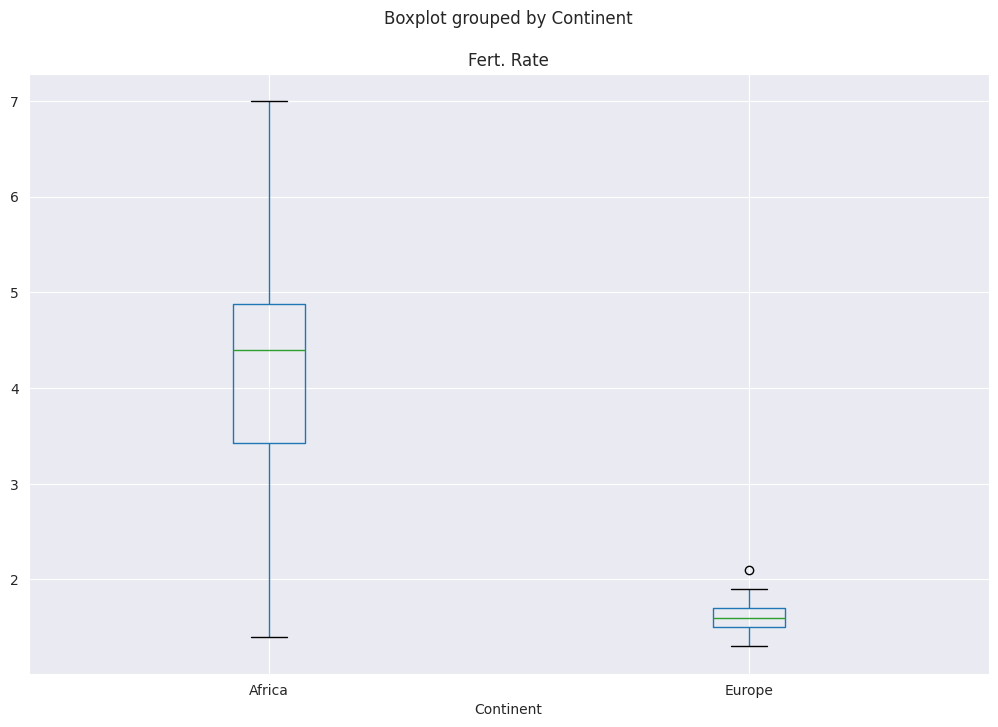

In [16]:
continents = ['Africa', 'Europe']
df3 = df[df['Continent'].isin(continents)]
df3.boxplot(by='Continent', column='Fert. Rate')

plt.show()

### Questão 2
Plote um gráfico de pizza que mostre a porcentagem da população de cada país da América do Suv em relação ao total de habitantes da América do Sul. Desconsidere a Guyana e a French Guiana.

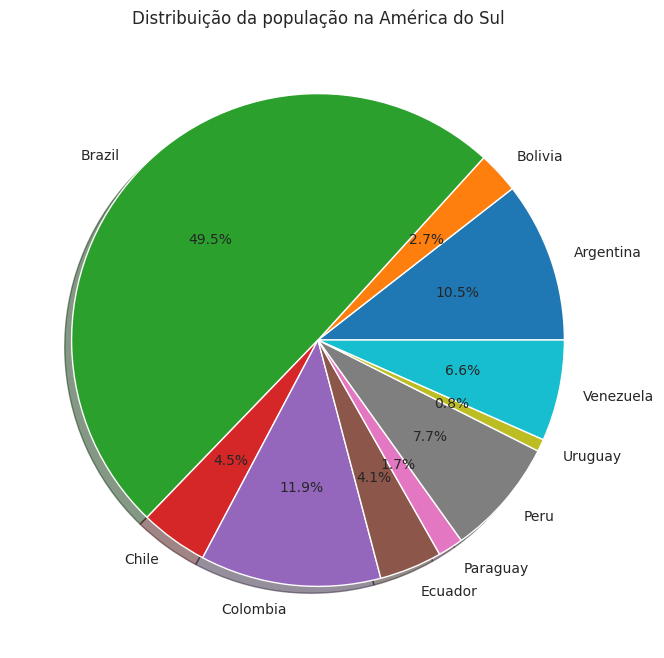

In [17]:
countriesToRemove = ['Guyana', 'French Guiana']
df4 = df[(df['Continent'] == 'South America') & ~df['Country'].isin(countriesToRemove)]

labels = df4['Country'].unique()
sizes = df4['Population (2020)']

sns.set_style('darkgrid')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição da população na América do Sul')
plt.show()

### Questão 3
Plote um gráfico de barras que mostre a média da população urbana (Urban Pop %) por continente.

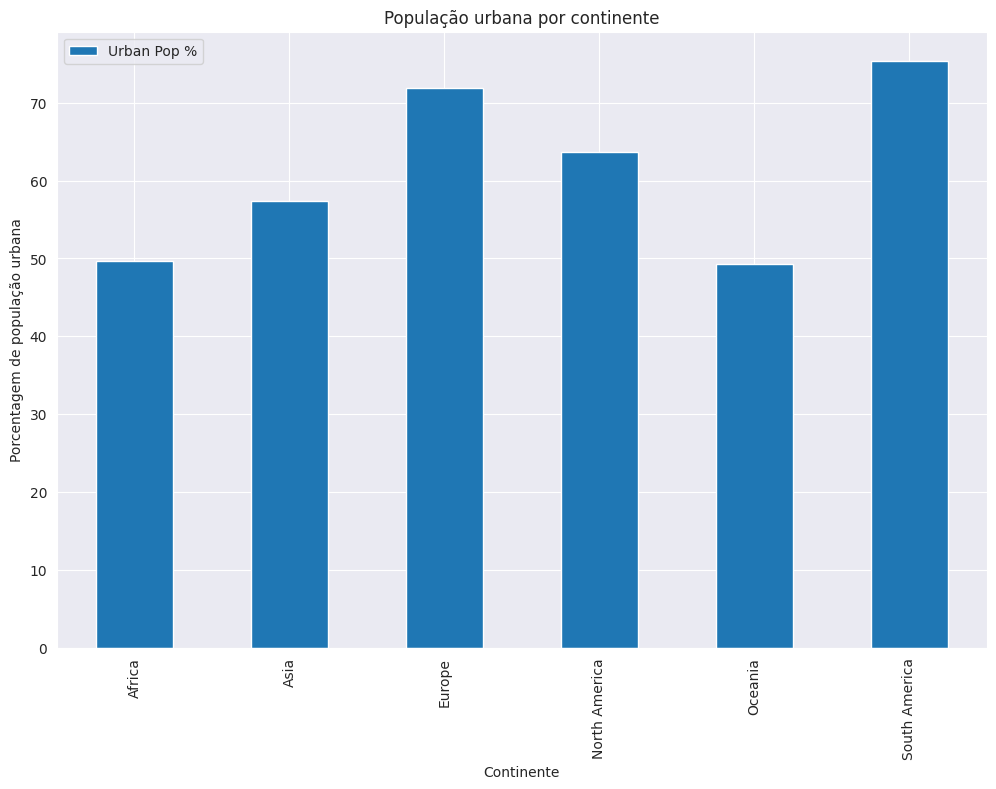

In [18]:
df5 = df[['Continent', 'Urban Pop %']].groupby('Continent').mean()
df5.plot(kind='bar', stacked=False)

plt.title('População urbana por continente')
plt.xlabel('Continente')
plt.ylabel('Porcentagem de população urbana')
plt.show()

### Questão 4
Plote dois histogramas lado a lado para comparar a média de idade dos países africanos e europeus. Use bins = 9.

/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aluno/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


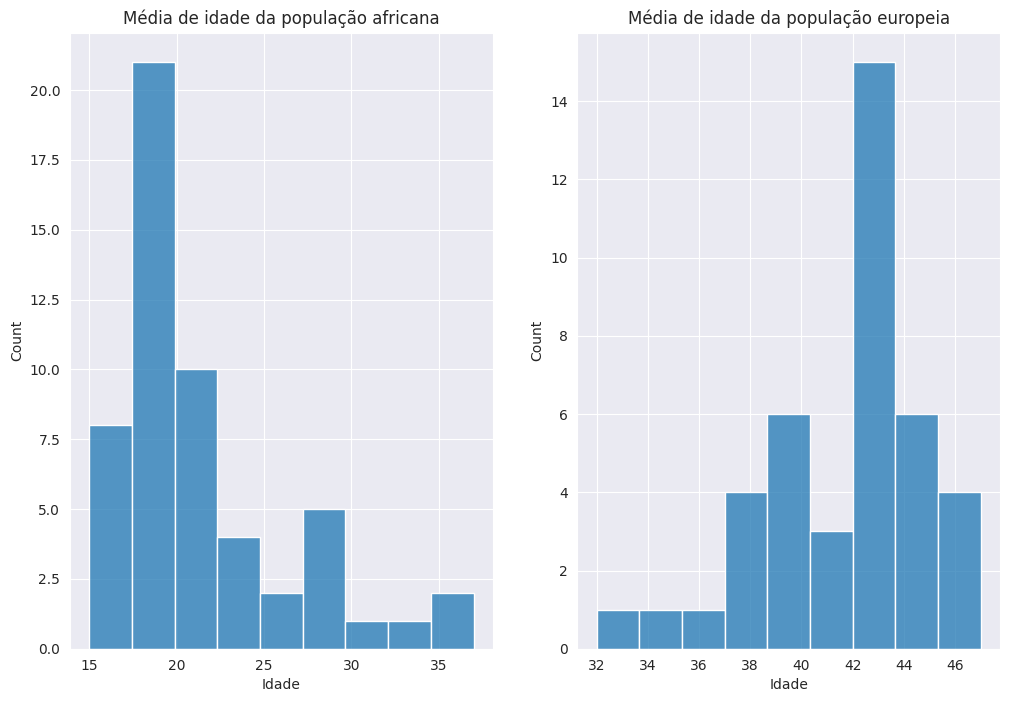

In [19]:
dfAfrica = df[df['Continent'] == 'Africa']
dfEurope = df[df['Continent'] == 'Europe']


plt.subplot(1, 2, 1)
sns.histplot(dfAfrica['Med. Age'], bins=9, kde=False)
plt.title('Média de idade da população africana')
plt.xlabel('Idade')

plt.subplot(1, 2, 2)
sns.histplot(dfEurope['Med. Age'], bins=9, kde=False)
plt.title('Média de idade da população europeia')
plt.xlabel('Idade')

plt.rcParams["figure.figsize"] = [12,8]
plt.show()

### Questão 5
Plote um gráfico de pizza que mostre a porcentagem da população dos 10 países mais populosos do mundo em relação ao total da população mundial. A 11a fatia da pizza deve conter a porcentagem do restante dos países.

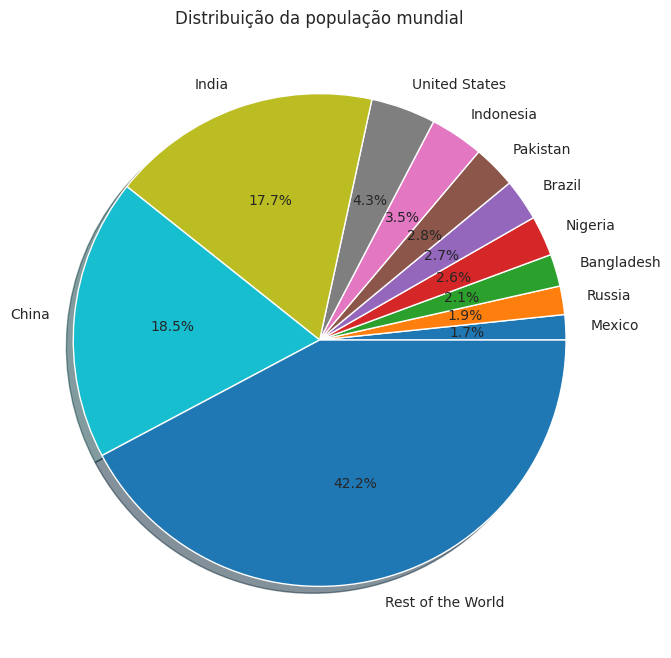

In [20]:
df6 = df.sort_values('World Share')
top10 = df6[-10:]
others = df6[:-10]

sizes = []
for wShare in top10['World Share']:
    sizes.append(wShare)
sizes.append(others['World Share'].sum())

labels = []
for country in top10['Country']:
    labels.append(country)
labels.append('Rest of the World')

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição da população mundial')
plt.show()